In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# 파일 경로 설정
file_path = "/content/drive/MyDrive/Colab Notebooks/boston.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

df.columns


Index(['Unnamed: 0', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [10]:
# 데이터 구조 확인
print(df.head())
print(df.info())

   Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0           0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1           1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2           2  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3           3  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4           4  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  PRICE  
0     37.88    -122.23  4.526  
1     37.86    -122.22  3.585  
2     37.85    -122.24  3.521  
3     37.85    -122.25  3.413  
4     37.85    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20640 non-null  int64  
 1   MedInc      20640 non-null  float64
 2   HouseAge    20640 non-null  float64
 3   AveRooms    20640 no

In [11]:
# 불필요한 index 컬럼 제거
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [12]:
# 입력(X), 출력(y) 분리
X = df.drop(columns=["PRICE"])
y = df["PRICE"]

In [14]:
# 2) 데이터 분할
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# 3) 모델 학습 (선형 회귀)
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# 4) 예측 및 평가
# -----------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("평균 제곱 오차 (MSE):", mse)
print("RMSE:", rmse)
print("R² score:", r2)

평균 제곱 오차 (MSE): 0.5558915986952444
RMSE: 0.7455813830127764
R² score: 0.5757877060324508


In [17]:
# 5) 회귀 계수 확인
# -----------------------------
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)

      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

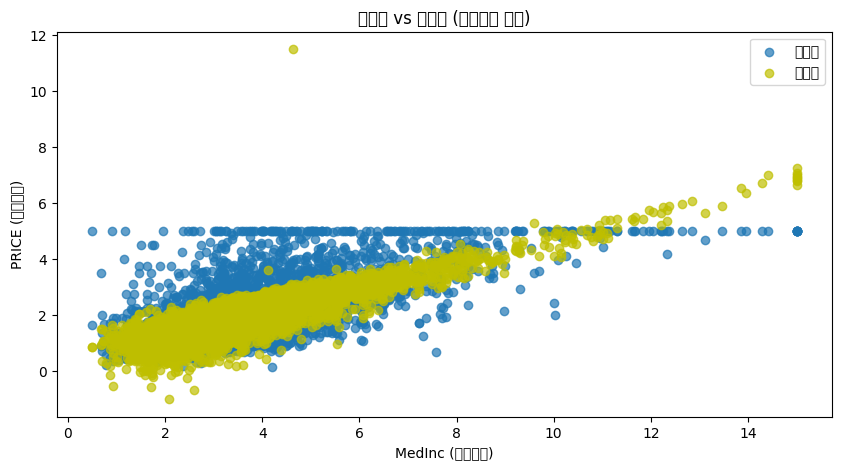

In [21]:
import matplotlib.pyplot as plt

# 예측값 구하기
y_preds = model.predict(X_test)

plt.figure(figsize=(10,5))

# 실제값 (파란 점)
plt.scatter(X_test['MedInc'], y_test, label='실제값', alpha=0.7)

# 예측값 (노란 점)
plt.scatter(X_test['MedInc'], y_preds, c='y', label='예측값', alpha=0.7)

plt.xlabel("MedInc (중위소득)")
plt.ylabel("PRICE (주택가격)")
plt.legend()
plt.title("실제값 vs 예측값 (중위소득 기준)")
plt.show()